<a href="https://colab.research.google.com/github/NandaDwiHusnaS/Sentimen-Analisis-KampanyePenguranganSampah/blob/main/AnalisisSentiment_kampayeSampah_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd  # Mengimpor library Pandas untuk pemrosesan data, termasuk membaca dan menulis file CSV
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/data_tweet_kampanyeSampah_bersih_tanpa_duplikat.csv')

df.head(5),df.shape  #first five rows and count of rows and columns

(   conversation_id_str                      created_at  favorite_count  \
 0         1.874726e+18  Thu Jan 02 07:55:00 +0000 2025               0   
 1         1.874622e+18  Thu Jan 02 01:02:03 +0000 2025               0   
 2         1.874526e+18  Wed Jan 01 20:47:31 +0000 2025               1   
 3         1.874526e+18  Wed Jan 01 20:45:06 +0000 2025               1   
 4         1.874447e+18  Wed Jan 01 13:24:55 +0000 2025               1   
 
                                                                                                                                                                                                                                                                                                                                             full_text  \
 0                                                                                                  Polusi Plastik: Ancaman Nyata untuk Masa Depan Polusi plastik di Indonesia diperkirakan melonjak hingg

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      4351 non-null   float64
 1   created_at               4351 non-null   object 
 2   favorite_count           4351 non-null   int64  
 3   full_text                4351 non-null   object 
 4   id_str                   4351 non-null   float64
 5   image_url                983 non-null    object 
 6   in_reply_to_screen_name  2537 non-null   object 
 7   lang                     4351 non-null   object 
 8   location                 0 non-null      float64
 9   quote_count              4351 non-null   int64  
 10  reply_count              4351 non-null   int64  
 11  retweet_count            4351 non-null   int64  
 12  tweet_url                4351 non-null   object 
 13  user_id_str              4351 non-null   float64
 14  username                

Mengambil data tweet nya saja

In [ ]:
# Asumsikan df_no_duplicates adalah DataFrame Anda setelah penggabungan dan penghapusan duplikat.
# df_no_duplicates memiliki kolom-kolom seperti yang Anda sebutkan:
# conversation_id_str, created_at, favorite_count, full_text, id_str, ...

# Langkah 1: Pilih kolom yang Anda butuhkan
# Anda sudah punya df_no_duplicates, sekarang kita ambil kolom 'full_text' saja.
# Namun, akan lebih baik jika Anda tetap menyertakan 'id_str' untuk referensi unik
# dan mungkin 'created_at' jika nanti Anda butuh menelusuri atau menganalisis tren waktu.
# Untuk tujuan analisis sentimen murni, 'full_text' adalah yang utama.

# Pilihan 1: Hanya menyimpan kolom 'full_text'
df_final = df[['full_text']].copy()

# Pilihan 2 (Direkomendasikan): Menyimpan 'id_str' dan 'full_text' untuk referensi
# df_final = df_no_duplicates[['id_str', 'full_text']].copy()

# Pilihan 3 (Lebih Lengkap): Menyimpan id, timestamp, dan full_text
# df_final = df_no_duplicates[['id_str', 'created_at', 'full_text']].copy()


# Langkah 2: Ganti nama kolom 'full_text' menjadi 'tweet' atau 'text' (Opsional tapi disarankan)
df_final.rename(columns={'full_text': 'tweet'}, inplace=True)

print("DataFrame setelah pemilihan dan rename kolom:")
print(df_final.head())
print(f"\nJumlah kolom akhir: {df_final.shape[1]}")
print(f"Nama kolom akhir: {df_final.columns.tolist()}")

# Sekarang df_final hanya berisi kolom 'tweet' (atau 'id_str', 'created_at', 'tweet'
# tergantung pilihan Anda). DataFrame ini yang akan Anda gunakan untuk:
# 1. Cleaning teks lebih lanjut
# 2. Pelabelan sentimen (dengan menambahkan kolom 'sentimen' baru)
# 3. Ekstraksi fitur
# 4. Pelatihan model Naïve Bayes

DataFrame setelah pemilihan dan rename kolom:
                                                                                                                                                                                                                                                                                                                                                tweet
0                                                                                                  Polusi Plastik: Ancaman Nyata untuk Masa Depan Polusi plastik di Indonesia diperkirakan melonjak hingga 27 juta ton pada tahun 2040. #SelamatkanBumi #KurangiPlastik #GoGreen #PolusiPlastik #IndonesiaBersih #Ayobacanews https://t.co/hfpA9ZKgEG
1                                                                                                                                                                                                                                        Negosiasi Bersejarah untuk Akhiri Pol

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4351 entries, 0 to 4350
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   4351 non-null   object
dtypes: object(1)
memory usage: 34.1+ KB


In [ ]:
print("\n5 baris pertama dari DataFrame setelah penghapusan duplikat:")
print(df_final.head())


5 baris pertama dari DataFrame setelah penghapusan duplikat:
                                                                                                                                                                                                                                                                                                                                                tweet
0                                                                                                  Polusi Plastik: Ancaman Nyata untuk Masa Depan Polusi plastik di Indonesia diperkirakan melonjak hingga 27 juta ton pada tahun 2040. #SelamatkanBumi #KurangiPlastik #GoGreen #PolusiPlastik #IndonesiaBersih #Ayobacanews https://t.co/hfpA9ZKgEG
1                                                                                                                                                                                                                                        Negosiasi Bersejarah 

Eksplorasi Data Awal

**Data Preparation**

In [ ]:
#data cleaning

# Diasumsikan 'df_selected_columns' adalah DataFrame Anda dari sub-bab 4.2.2
# dengan kolom 'id_str', 'created_at', dan 'text'.
df_cleaned = df_final.copy() # Membuat salinan untuk menyimpan hasil pembersihan

def clean_text_data(text):
    # Menghilangkan URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Menghilangkan Username (@mention)
    text = re.sub(r'@\w+', '', text)
    # Menghilangkan Angka
    text = re.sub(r'\d+', '', text)
    # Menghilangkan Tanda Baca (kecuali yang mungkin relevan, misal !, ? - di sini semua dihapus)
    text = re.sub(r'[^\w\s]', '', text) # Menghilangkan semua kecuali huruf, angka, dan spasi
                                      # Jika Anda ingin mempertahankan !, ?, sesuaikan regex ini
    # Menghilangkan Spasi Berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Menerapkan fungsi pembersihan ke kolom 'tweet' dan menyimpan hasilnya di kolom baru 'tweet_clean'
df_cleaned['tweet_clean'] = df_cleaned['tweet'].apply(clean_text_data)

pd.set_option('display.max_colwidth', None)
print("Contoh Perbandingan Teks Asli dan Teks Setelah Pembersihan Data:")
print(df_cleaned[['tweet', 'tweet_clean']].head())

# Output info dan shape untuk memastikan tidak ada perubahan struktural
print(f"\nShape DataFrame setelah Pembersihan Data: {df_cleaned.shape}")

# df_cleaned sekarang memiliki kolom 'tweet_clean'

Contoh Perbandingan Teks Asli dan Teks Setelah Pembersihan Data:
                                                                                                                                                                                                                                                                                                                                                tweet  \
0                                                                                                  Polusi Plastik: Ancaman Nyata untuk Masa Depan Polusi plastik di Indonesia diperkirakan melonjak hingga 27 juta ton pada tahun 2040. #SelamatkanBumi #KurangiPlastik #GoGreen #PolusiPlastik #IndonesiaBersih #Ayobacanews https://t.co/hfpA9ZKgEG   
1                                                                                                                                                                                                                                        Negosiasi Be

case folding

In [ ]:
# Diasumsikan 'df_cleaned' adalah DataFrame Anda dari sub-bab 4.2.4
# dengan kolom 'text_clean'.

# Membuat salinan untuk menyimpan hasil case folding
df_case_folded = df_cleaned.copy()

# Menerapkan case folding ke kolom 'text_clean'
df_case_folded['tweet_clean'] = df_case_folded['tweet_clean'].str.lower()

print("Contoh Teks Setelah Case Folding:")
print(df_case_folded[['tweet', 'tweet_clean']].head())

print(f"\nShape DataFrame setelah Case Folding: {df_case_folded.shape}")

# df_case_folded sekarang memiliki kolom 'text_clean' yang sudah di-case folded

Contoh Teks Setelah Case Folding:
                                                                                                                                                                                                                                                                                                                                                tweet  \
0                                                                                                  Polusi Plastik: Ancaman Nyata untuk Masa Depan Polusi plastik di Indonesia diperkirakan melonjak hingga 27 juta ton pada tahun 2040. #SelamatkanBumi #KurangiPlastik #GoGreen #PolusiPlastik #IndonesiaBersih #Ayobacanews https://t.co/hfpA9ZKgEG   
1                                                                                                                                                                                                                                        Negosiasi Bersejarah untuk Akhiri Polusi Pl

tokenisasi

In [ ]:
import nltk
nltk.download('punkt_tab') # Ini sudah Anda punya, tapi biarkan saja
nltk.download('stopwords') # Ini juga
from nltk.tokenize import word_tokenize

# Diasumsikan 'df_case_folded' adalah DataFrame Anda dari sub-bab 4.2.5
# dengan kolom 'text_clean'.

# Membuat salinan untuk menyimpan hasil tokenisasi
df_tokenized = df_case_folded.copy()

# Menerapkan tokenisasi ke kolom 'text_clean'
# Hasilnya akan menjadi list kata-kata untuk setiap tweet
df_tokenized['tokens'] = df_tokenized['tweet_clean'].apply(word_tokenize)

print("Contoh Teks Setelah Tokenisasi:")
print(df_tokenized[['tweet_clean', 'tokens']].head())

print(f"\nShape DataFrame setelah Tokenisasi: {df_tokenized.shape}")

# df_tokenized sekarang memiliki kolom 'tokens' yang berisi list kata-kata

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Contoh Teks Setelah Tokenisasi:
                                                                                                                                                                                                                                                                         tweet_clean  \
0                                                                         polusi plastik ancaman nyata untuk masa depan polusi plastik di indonesia diperkirakan melonjak hingga juta ton pada tahun selamatkanbumi kurangiplastik gogreen polusiplastik indonesiabersih ayobacanews   
1                                                                                                                                                                                                 negosiasi bersejarah untuk akhiri polusi plastik dan peran indonesia pjmi pjminews   
2                                       stop bakar sampah makanan kayu apalagi plastik stop pembakaran kabel karet aki beks yg s

normalisasi

In [ ]:
import pandas as pd
# Pastikan file 'kamus perbaikan kata.csv' sudah diunggah atau terhubung di Google Drive
# Contoh jika di root /content/ setelah upload manual:
# normalized_word_path = '/content/kamus perbaikan kata.csv'
# Contoh jika di Google Drive:
normalized_word_path = '/content/drive/MyDrive/Skripsi/normalisasi.csv' # SESUAIKAN PATH INI

# Diasumsikan 'df_tokenized' adalah DataFrame Anda dari sub-bab 4.2.6
# dengan kolom 'tokens' (list of words).

# Membuat salinan untuk menyimpan hasil normalisasi
df_normalized = df_tokenized.copy()

# Membaca kamus perbaikan kata
try:
    normalized_word = pd.read_csv(normalized_word_path)
    # Membuat dictionary dari DataFrame kamus perbaikan
    # Asumsi kolom pertama adalah kata lama, kolom kedua adalah kata baru
    normalized_word_dict = dict(zip(normalized_word.iloc[:, 0], normalized_word.iloc[:, 1]))
    print("Kamus perbaikan kata berhasil dimuat.")
    # Menampilkan beberapa entri dari kamus perbaikan
    # print("Contoh entri kamus perbaikan:", list(normalized_word_dict.items())[:5])

except FileNotFoundError:
    print(f"Error: File kamus perbaikan kata tidak ditemukan di '{normalized_word_path}'. Pastikan path sudah benar.")
    print("Normalisasi kata akan dilewati.")
    df_normalized['tokens_normalized'] = df_normalized['tokens'] # Lanjut tanpa normalisasi jika file tidak ditemukan
except Exception as e:
    print(f"Error saat memuat kamus perbaikan kata: {e}")
    print("Normalisasi kata akan dilewati.")
    df_normalized['tokens_normalized'] = df_normalized['tokens'] # Lanjut tanpa normalisasi jika ada error lain


# Fungsi untuk melakukan normalisasi pada list of tokens
def normalized_term(document_tokens):
    return [normalized_word_dict.get(term, term) for term in document_tokens]

# Menerapkan fungsi normalisasi ke kolom 'tokens'
if 'normalized_word_dict' in locals(): # Pastikan kamus berhasil dimuat
    df_normalized['tokens_normalized'] = df_normalized['tokens'].apply(normalized_term)
else:
    # Jika kamus tidak dimuat karena error, kolom ini sudah diisi di blok try-except
    pass


print("\nContoh Teks Setelah Normalisasi Kata:")
# Menampilkan perbandingan kolom 'tokens' asli dengan 'tokens_normalized'
print(df_normalized[['tokens', 'tokens_normalized']].head())

print(f"\nShape DataFrame setelah Normalisasi Kata: {df_normalized.shape}")

# df_normalized sekarang memiliki kolom 'tokens_normalized'

Error saat memuat kamus perbaikan kata: single positional indexer is out-of-bounds
Normalisasi kata akan dilewati.

Contoh Teks Setelah Normalisasi Kata:
                                                                                                                                                                                                                                                                                                                         tokens  \
0                                                                                           [polusi, plastik, ancaman, nyata, untuk, masa, depan, polusi, plastik, di, indonesia, diperkirakan, melonjak, hingga, juta, ton, pada, tahun, selamatkanbumi, kurangiplastik, gogreen, polusiplastik, indonesiabersih, ayobacanews]   
1                                                                                                                                                                                                       

Stopword Removal

In [ ]:
#

In [ ]:
!pip install Sastrawi
nltk.download('punkt_tab')
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Salin DataFrame hasil tokenisasi
df_stopwords_removed = df_normalized.copy()

# Inisialisasi factory dan stopword remover
factory = StopWordRemoverFactory()

# Jika kamu ingin menambahkan stopword khusus:
more_stop_words = ["wkwk"]
stopwords_default = factory.get_stop_words()
stopwords_final = set(stopwords_default + more_stop_words)

# Fungsi untuk menghapus stopword dari teks (dalam bentuk string)
def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stopwords_final]
    return ' '.join(filtered)

# Gabungkan list token menjadi string agar bisa difilter
df_stopwords_removed['text_joined'] = df_stopwords_removed['tokens_normalized'].apply(lambda tokens: ' '.join(tokens))

# Terapkan stopword removal
df_stopwords_removed['text_cleaned'] = df_stopwords_removed['text_joined'].apply(remove_stopwords)

# Jika mau dikembalikan ke bentuk token lagi:
df_stopwords_removed['tokens_filtered'] = df_stopwords_removed['text_cleaned'].apply(lambda text: text.split())

# Tampilkan contoh hasilnya
print("Contoh Teks Setelah Stopword Removal (menggunakan daftar kustom):")
print(df_stopwords_removed[['tokens_normalized', 'tokens_filtered']].head(15))

print(f"\nShape DataFrame setelah Stopword Removal: {df_stopwords_removed.shape}")


Contoh Teks Setelah Stopword Removal (menggunakan daftar kustom):
                                                                                                                                                                                                                                                                                                                         tokens_normalized  \
0                                                                                                      [polusi, plastik, ancaman, nyata, untuk, masa, depan, polusi, plastik, di, indonesia, diperkirakan, melonjak, hingga, juta, ton, pada, tahun, selamatkanbumi, kurangiplastik, gogreen, polusiplastik, indonesiabersih, ayobacanews]   
1                                                                                                                                                                                                                                           [negosiasi, bersejarah, untuk,

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Stemming

In [ ]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Diasumsikan 'df_stopwords_removed' adalah DataFrame Anda dengan kolom 'tokens_filtered'

# Membuat salinan DataFrame
df_stemmed = df_stopwords_removed.copy()

# Inisialisasi stemmer Sastrawi (Nazief & Adriani)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar kata kunci topik lingkungan (penyesuaian stemming manual)
custom_root_words = {
    'pengurangan': 'kurang',
    'mengurangi': 'kurang',
    'berkurang': 'kurang',
    'penggunaan': 'pakai',
    'memakai': 'pakai',
    'pemakaian': 'pakai',
    'dipakai': 'pakai',
    'pelestarian': 'lestar',
    'melestarikan': 'lestar',
    'pencemaran': 'cemar',
    'mencemari': 'cemar',
    'pengelolaan': 'kelola',
    'dikelola': 'kelola',
    'sampahnya': 'sampah',
    'memplastiki': 'plastik',
    'pengumpulan': 'kumpul',

}

def custom_stem(word):
    word_lower = word.lower()
    if word_lower in custom_root_words:
        return custom_root_words[word_lower]
    return stemmer.stem(word_lower)

def stem_tokens(tokens):
    return [custom_stem(word) for word in tokens]

# Terapkan stemming yang disesuaikan
df_stemmed['tokens_stemmed'] = df_stemmed['tokens_filtered'].apply(stem_tokens)

# Ubah hasil token kembali ke teks utuh
df_stemmed['text_final'] = df_stemmed['tokens_stemmed'].apply(lambda x: ' '.join(x))

# Tampilkan contoh hasil
print("Contoh Teks Setelah Stemming:")
print(df_stemmed[['tokens_filtered', 'tokens_stemmed', 'text_final']].head())

print(f"\nShape DataFrame setelah Stemming: {df_stemmed.shape}")


Contoh Teks Setelah Stemming:
                                                                                                                                                                                                                                                 tokens_filtered  \
0                                             [polusi, plastik, ancaman, nyata, masa, depan, polusi, plastik, indonesia, diperkirakan, melonjak, hingga, juta, ton, tahun, selamatkanbumi, kurangiplastik, gogreen, polusiplastik, indonesiabersih, ayobacanews]   
1                                                                                                                                                                             [negosiasi, bersejarah, akhiri, polusi, plastik, peran, indonesia, pjmi, pjminews]   
2                                         [stop, bakar, sampah, makanan, kayu, plastik, stop, pembakaran, kabel, karet, aki, beks, terpakai, sterofoam, springbed, palet, biru, pelabuhan, pec

Labeling

Mengunduh dan memuat model: mdhugol/indonesia-bert-sentiment-classification...


Device set to use cpu


Model dan tokenizer berhasil dimuat.

Memulai proses pelabelan sentimen otomatis...
Pelabelan sentimen selesai.

5 baris pertama DataFrame setelah pelabelan sentimen otomatis:
                                                                                                                                                                                                   text_final  \
0                            polusi plastik ancam nyata masa depan polusi plastik indonesia kira lonjak hingga juta ton tahun selamatkanbumi kurangiplastik gogreen polusiplastik indonesiabersih ayobacanews   
1                                                                                                                                        negosiasi sejarah akhir polusi plastik peran indonesia pjmi pjminews   
2                                      stop bakar sampah makan kayu plastik stop bakar kabel karet aki beks pakai sterofoam springbed palet biru labuh pecah rusak benda bakar datang bencana salah n

/tmp/ipython-input-38-3481199841.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=df_labeled, palette='viridis', order=['Positif', 'Netral', 'Negatif'])


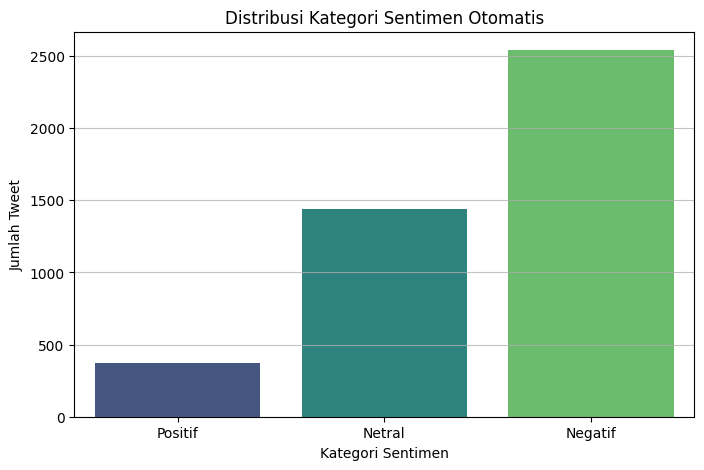


DataFrame yang telah dilabeli sentimen disimpan sebagai '/content/data_tweet_labeled_sentiment.csv'


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
# Pastikan Anda sudah menginstal transformers jika belum:
!pip install transformers

# Import modul yang dibutuhkan dari transformers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# ==============================================================================
# Bagian 1: Inisialisasi Model Hugging Face
# Kode ini bisa diletakkan di awal cell ini atau di cell terpisah jika Anda mau
# ==============================================================================
pretrained_model_name = "mdhugol/indonesia-bert-sentiment-classification"

# Muat model dan tokenizer
# Catatan: Ini akan mengunduh model dan tokenizer jika belum ada
print(f"Mengunduh dan memuat model: {pretrained_model_name}...")
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
print("Model dan tokenizer berhasil dimuat.")

# Membuat pipeline untuk analisis sentimen
sentiment_analysis_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Peta indeks label dari model ke label yang lebih mudah dibaca
label_index = {'LABEL_0': 'Positif', 'LABEL_1': 'Netral', 'LABEL_2': 'Negatif'}

# ==============================================================================
# Bagian 2: Menerapkan Pelabelan ke DataFrame
# ==============================================================================

# Diasumsikan 'df_stemmed' adalah DataFrame Anda dari sub-bab 4.2.9
# dengan kolom 'text_final' yang berisi teks bersih dan distem.
df_labeled = df_stemmed.copy() # Membuat salinan untuk menyimpan hasil pelabelan

# Inisialisasi kolom baru untuk sentimen dan skor
df_labeled['sentimen'] = None
df_labeled['sentimen_score'] = None

print("\nMemulai proses pelabelan sentimen otomatis...")

# Iterasi melalui setiap baris DataFrame untuk klasifikasi sentimen
# Gunakan iterrows() untuk efisiensi, tetapi pastikan kolom 'text_final' ada
for index, row in df_labeled.iterrows():
    try:
        # Ambil teks dari kolom 'text_final'
        text_to_classify = row["text_final"]

        # Pastikan teks tidak kosong atau NaN sebelum diklasifikasi
        if pd.isna(text_to_classify) or text_to_classify.strip() == "":
            df_labeled.at[index, "sentimen"] = "Netral" # Atau label sebagai 'Tidak_Dapat_Diklasifikasi'
            df_labeled.at[index, "sentimen_score"] = 0.0
            continue

        # Klasifikasikan teks dan dapatkan hasilnya
        result = sentiment_analysis_pipeline(text_to_classify)

        # Ekstrak label dan skor
        status = label_index[result[0]["label"]]
        score = result[0]["score"]

        # Tambahkan label dan skor ke DataFrame
        df_labeled.at[index, "sentimen"] = status
        df_labeled.at[index, "sentimen_score"] = score

    except Exception as e:
        # Tangani error, misalnya jika ada teks yang terlalu panjang atau masalah lain
        print(f"Error saat mengklasifikasi indeks {index}: {e}")
        df_labeled.at[index, "sentimen"] = "Error" # Label sebagai error
        df_labeled.at[index, "sentimen_score"] = 0.0
        continue

print("Pelabelan sentimen selesai.")

# ==============================================================================
# Bagian 3: Verifikasi Hasil dan Simpan
# ==============================================================================

print("\n5 baris pertama DataFrame setelah pelabelan sentimen otomatis:")
print(df_labeled[['text_final', 'sentimen', 'sentimen_score']].head())

# Menampilkan distribusi sentimen
print("\nDistribusi Sentimen dalam Dataset:")
print(df_labeled['sentimen'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='sentimen', data=df_labeled, palette='viridis', order=['Positif', 'Netral', 'Negatif'])
plt.title('Distribusi Kategori Sentimen Otomatis')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Tweet')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Menyimpan DataFrame yang telah dilabeli ke CSV baru
# Sesuaikan path output sesuai dengan lokasi penyimpanan Anda di Colab/Google Drive
output_filename_labeled = '/content/data_tweet_labeled_sentiment.csv'
# output_filename_labeled = '/content/drive/My Drive/Skripsi/data_tweet_labeled_sentiment.csv' # Contoh untuk Google Drive

df_labeled.to_csv(output_filename_labeled, index=False)
print(f"\nDataFrame yang telah dilabeli sentimen disimpan sebagai '{output_filename_labeled}'")

# 'df_labeled' adalah DataFrame akhir yang siap untuk Pembagian Data Latih/Uji dan Ekstraksi Fitur

MODELLING




SPLIT DATA MENJADI DATA TRAIN DAN TEST

In [ ]:

# Import library yang dibutuhkan
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# 1. Membaca data dari file CSV
# Gantilah 'nama_file.csv' dengan nama file CSV yang sesuai
df_labeled = pd.read_csv('data_tweet_labeled_sentiment.csv')  # asumsi file sudah memiliki kolom 'text_final' dan 'sentimen'

# 2. Pembagian data menjadi fitur (X) dan label (y)
X = df_labeled['text_final']
y = df_labeled['sentimen']

# 3. Vektorisasi teks menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 4. Split dataset menjadi training dan testing (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized,
    y,
    test_size=0.2, # Ubah sesuai kebutuhan: 0.2 untuk 80:20, 0.3 untuk 70:30, dll.
    random_state=42
)

# 5. Tampilkan informasi hasil split
print("Jumlah Data Latihan dan Pengujian:")
print(f"Jumlah data fitur pelatihan (X_train): {X_train.shape[0]}")
print(f"Jumlah label pelatihan (y_train): {y_train.shape[0]}")
print(f"Jumlah data fitur pengujian (X_test): {X_test.shape[0]}")
print(f"Jumlah label pengujian (y_test): {y_test.shape[0]}")
print(f"Jumlah fitur unik (vocabulary): {X_train.shape[1]}")


Jumlah Data Latihan dan Pengujian:
Jumlah data fitur pelatihan (X_train): 3480
Jumlah label pelatihan (y_train): 3480
Jumlah data fitur pengujian (X_test): 871
Jumlah label pengujian (y_test): 871
Jumlah fitur unik (vocabulary): 9540


In [ ]:
# Ambil fitur (kata-kata unik)
feature_names = vectorizer.get_feature_names_out()

# Konversi hasil TF-IDF ke DataFrame
tfidf_df = pd.DataFrame(X_vectorized.toarray(), columns=feature_names)

# Ambil contoh 2 dokumen dan 10 kata unik pertama
example_df = tfidf_df[feature_names[:10]].head(15)

# Tampilkan sebagai tabel
print(example_df)

     aa  aamiin  aarumrumi  abad  abadi  abah  abahbongkeng      abai  abang  \
0   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
1   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
2   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
3   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
4   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
5   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
6   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
7   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
8   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
9   0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
10  0.0     0.0        0.0   0.0    0.0   0.0           0.0  0.000000    0.0   
11  0.0     0.0        0.0   0.0    0.0 

klasifikasi

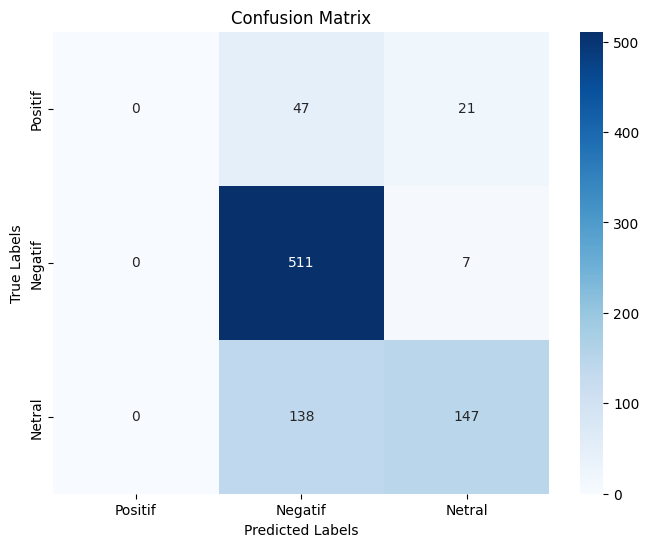

Akurasi : 0.7554535017221584
Presisi : 0.5247318007662836
Recall   : 0.5007586533902324
F1-Score : 0.49365852493851925

Kelas Positif:
TP: 0, FP: 0, FN: 68, TN: 803

Kelas Negatif:
TP: 511, FP: 185, FN: 7, TN: 168

Kelas Netral:
TP: 147, FP: 28, FN: 138, TN: 558


In [ ]:
# Import library yang dibutuhkan
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# ========================
# 1. Training Model Naive Bayes
# ========================
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# ========================
# 2. Prediksi dengan data uji
# ========================
y_pred = nb_model.predict(X_test)

# ========================
# 3. Evaluasi Model
# ========================

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["Positif", "Negatif", "Netral"])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Positif", "Negatif", "Netral"],
            yticklabels=["Positif", "Negatif", "Netral"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ========================
# 4. Skor Evaluasi
# ========================
print("Akurasi :", accuracy_score(y_test, y_pred))
print("Presisi :", precision_score(y_test, y_pred, average='macro', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, average='macro', zero_division=0))
print("F1-Score :", f1_score(y_test, y_pred, average='macro', zero_division=0))

# ========================
# 5. TP, FP, FN, TN untuk Setiap Kelas
# ========================
conf_matrix = confusion_matrix(y_test, y_pred, labels=["Positif", "Negatif", "Netral"])
class_labels = ["Positif", "Negatif", "Netral"]
num_classes = conf_matrix.shape[0]

for i in range(num_classes):
    TP = conf_matrix[i, i]
    FP = conf_matrix[:, i].sum() - TP
    FN = conf_matrix[i, :].sum() - TP
    TN = conf_matrix.sum() - (TP + FP + FN)
    print(f"\nKelas {class_labels[i]}:")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")


ROS Random Oversampling

In [ ]:
#pip install imbalanced-learn

Jumlah Data Latihan dan Pengujian (Sebelum ROS):
X_train: 3480, y_train: 3480
X_test: 871, y_test: 871
Jumlah fitur unik: 9540

Distribusi kelas sebelum ROS:
Counter({'Negatif': 2033, 'Netral': 1152, 'Positif': 295})

Melakukan oversampling dengan RandomOverSampler...
Oversampling ROS selesai.

Distribusi kelas sesudah ROS:
Counter({'Negatif': 2033, 'Netral': 2033, 'Positif': 2033})


/tmp/ipython-input-5-2650487105.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_ros, palette='viridis', order=['Positif', 'Netral', 'Negatif'])


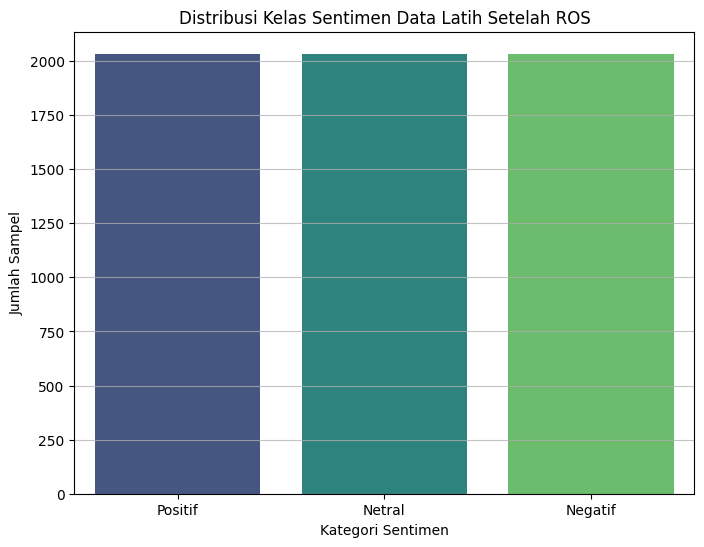


Melatih model Multinomial Naïve Bayes dengan data ROS...
Model berhasil dilatih.

--- Hasil Evaluasi Model Naïve Bayes Pasca-ROS ---


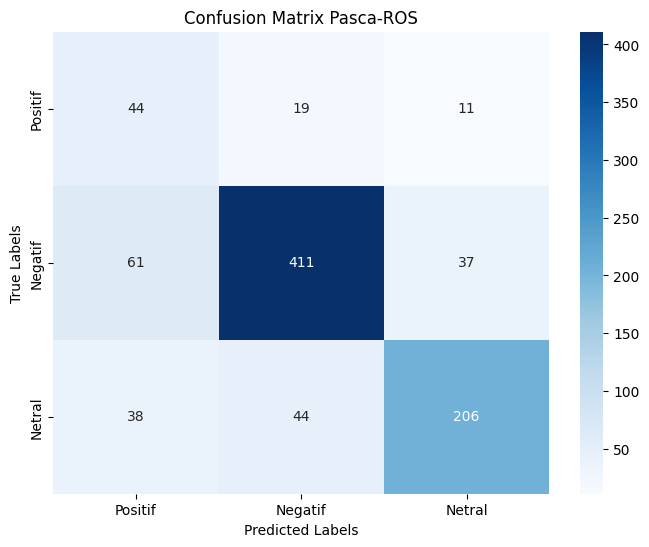

Akurasi  : 0.7588978185993112
Presisi  : 0.6619348457781629
Recall   : 0.7057793304109611
F1-Score : 0.6672977405735447

Kelas Positif:
TP: 44, FP: 99, FN: 30, TN: 698

Kelas Negatif:
TP: 411, FP: 63, FN: 98, TN: 299

Kelas Netral:
TP: 206, FP: 48, FN: 82, TN: 535


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler  # Ganti dari SMOTE ke ROS

# 1. Membaca data
df_labeled = pd.read_csv('data_tweet_labeled_sentiment.csv')  # Pastikan kolom 'text_final' dan 'sentimen' ada

# 2. Pisahkan fitur dan label
X = df_labeled['text_final']
y = df_labeled['sentimen']

# 3. TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# 4. Split 60:40 stratified
X_train, X_test, y_train, y_test = train_test_split(
    X_vectorized,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 5. Info sebelum ROS
print("Jumlah Data Latihan dan Pengujian (Sebelum ROS):")
print(f"X_train: {X_train.shape[0]}, y_train: {y_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}, y_test: {y_test.shape[0]}")
print(f"Jumlah fitur unik: {X_train.shape[1]}")
print("\nDistribusi kelas sebelum ROS:")
print(Counter(y_train))

# 6. Oversampling dengan RandomOverSampler
print("\nMelakukan oversampling dengan RandomOverSampler...")
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print("Oversampling ROS selesai.")
print("\nDistribusi kelas sesudah ROS:")
print(Counter(y_train_ros))

# Visualisasi distribusi kelas setelah ROS
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_ros, palette='viridis', order=['Positif', 'Netral', 'Negatif'])
plt.title('Distribusi Kelas Sentimen Data Latih Setelah ROS')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Sampel')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 7. Latih model Naive Bayes
print("\nMelatih model Multinomial Naïve Bayes dengan data ROS...")
nb_model_ros = MultinomialNB()
nb_model_ros.fit(X_train_ros, y_train_ros)
print("Model berhasil dilatih.")

# 8. Prediksi
y_pred_ros = nb_model_ros.predict(X_test)

# 9. Evaluasi model
print("\n--- Hasil Evaluasi Model Naïve Bayes Pasca-ROS ---")

# Confusion Matrix
cm_ros = confusion_matrix(y_test, y_pred_ros, labels=["Positif", "Negatif", "Netral"])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ros, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Positif", "Negatif", "Netral"],
            yticklabels=["Positif", "Negatif", "Netral"])
plt.title('Confusion Matrix Pasca-ROS')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Skor evaluasi
print("Akurasi  :", accuracy_score(y_test, y_pred_ros))
print("Presisi  :", precision_score(y_test, y_pred_ros, average='macro', zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_ros, average='macro', zero_division=0))
print("F1-Score :", f1_score(y_test, y_pred_ros, average='macro', zero_division=0))

# Detail TP, FP, FN, TN per kelas
conf_matrix_detail = cm_ros
class_labels = ["Positif", "Negatif", "Netral"]

for i in range(len(class_labels)):
    TP = conf_matrix_detail[i, i]
    FP = conf_matrix_detail[:, i].sum() - TP
    FN = conf_matrix_detail[i, :].sum() - TP
    TN = conf_matrix_detail.sum() - (TP + FP + FN)
    print(f"\nKelas {class_labels[i]}:")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
